In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

In [3]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [4]:
parametros = ['INDE', 'PEDRA', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'IPV', 'IAN', 'PONTO_VIRADA']
anos = ['2020', '2021', '2022']

In [5]:
colunas = [f'{parametro}_{ano}' for parametro in parametros for ano in anos]

In [6]:
df = df[colunas]

In [7]:
df = df.fillna(0)

In [8]:
df.head()

,INDE_2020,INDE_2021,INDE_2022,PEDRA_2020,PEDRA_2021,PEDRA_2022,IAA_2020,IAA_2021,IAA_2022,IEG_2020,...,IPP_2022,IPV_2020,IPV_2021,IPV_2022,IAN_2020,IAN_2021,IAN_2022,PONTO_VIRADA_2020,PONTO_VIRADA_2021,PONTO_VIRADA_2022
0,7.883752,7.319,0.000000,Ametista,Ametista,0,8.500020000000001,7.5,0.00000,8.7,...,0.000000,7.75,8.1,0.000000,10,5.0,0.0,Não,Não,0
1,0,0,7.675509,0,0,Ametista,0,0.0,10.00002,0,...,5.625000,0,0.0,7.916665,0,0.0,5.0,0,0,Não
2,7.856389666666666,7.021,0.000000,Ametista,Ametista,0,7.91667,7.1,0.00000,8.9,...,0.000000,8.111113333333334,7.2,0.000000,10,10.0,0.0,Não,Não,0
3,5.076252,0,7.117065,Quartzo,0,Ametista,8.000020000000001,0.0,10.00002,4.1,...,6.250000,7.75,0.0,8.055553,5,0.0,5.0,Não,0,Não
4,8.077085,7.399,7.232336,Ametista,Ametista,Ametista,7.50002,7.4,6.41668,8,...,6.458333,8.166665,7.4,7.833337,10,10.0,5.0,Não,Não,Não


In [9]:
def get_ultimo_1_ano(row):
    if row['PONTO_VIRADA_2022'] != 0:
        return [row[f'{coluna}_2022'] for coluna in parametros]
    elif row['PONTO_VIRADA_2021'] != 0:
        return [row[f'{coluna}_2021'] for coluna in parametros]
    else:
        return [row[f'{coluna}_2020'] for coluna in parametros]

In [10]:
def get_ultimo_2_ano(row):
    if row['PONTO_VIRADA_2022'] != 0:
        return [row[f'{coluna}_2021'] for coluna in parametros]
    elif row['PONTO_VIRADA_2021'] != 0:
        return [row[f'{coluna}_2020'] for coluna in parametros]
    else:
        return [0 for coluna in parametros]

In [11]:
def get_ultimo_3_ano(row):
    if row['PONTO_VIRADA_2022'] != 0:
        return [row[f'{coluna}_2020'] for coluna in parametros]
    else:
        return [0 for coluna in parametros]

In [12]:
df_ultimo_1_ano = df.apply(get_ultimo_1_ano, axis=1, result_type='expand')
df_ultimo_1_ano.columns = [f'{parametro}_ultimo_1_ano' for parametro in parametros]

In [13]:
df_ultimo_2_ano = df.apply(get_ultimo_2_ano, axis=1, result_type='expand')
df_ultimo_2_ano.columns = [f'{parametro}_ultimo_2_ano' for parametro in parametros]

In [14]:
df_ultimo_3_ano = df.apply(get_ultimo_3_ano, axis=1, result_type='expand')
df_ultimo_3_ano.columns = [f'{parametro}_ultimo_3_ano' for parametro in parametros]

In [15]:
df_ano_relativo = pd.concat([df_ultimo_1_ano, df_ultimo_2_ano, df_ultimo_3_ano], axis=1)

In [16]:
df_ano_relativo['ponto_virada'] = df_ano_relativo.apply(lambda r: True if r['PONTO_VIRADA_ultimo_1_ano'] == 'Sim' or r['PONTO_VIRADA_ultimo_2_ano'] == 'Sim' or r['PONTO_VIRADA_ultimo_3_ano'] == 'Sim' else False, axis=1)

In [17]:
df_ano_relativo = df_ano_relativo.drop(['PONTO_VIRADA_ultimo_1_ano', 'PONTO_VIRADA_ultimo_2_ano', 'PONTO_VIRADA_ultimo_3_ano'], axis=1)

In [18]:
def transform_in_float(value):
    try:
        value = float(value)
    except:
        value = 0
    return value

In [19]:
for coluna in df_ano_relativo.columns:
    if coluna in ['PEDRA_ultimo_1_ano', 'PEDRA_ultimo_2_ano', 'PEDRA_ultimo_3_ano', 'ponto_virada']:
        continue
    df_ano_relativo[coluna] = df_ano_relativo[coluna].apply(transform_in_float)

<Axes: >

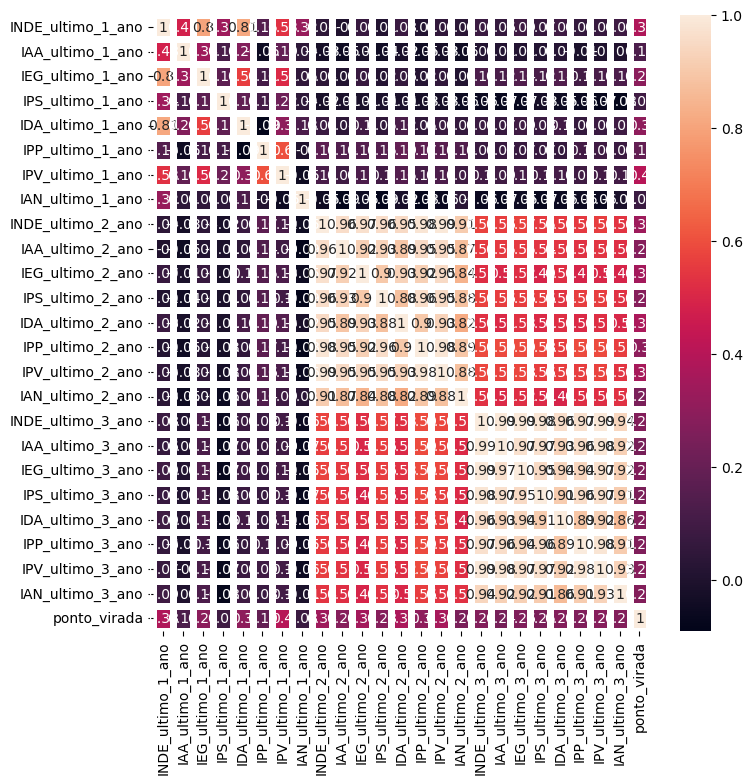

In [20]:
correlation_matrix = df_ano_relativo.drop(['PEDRA_ultimo_1_ano', 'PEDRA_ultimo_2_ano', 'PEDRA_ultimo_3_ano'], axis=1).corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=5, ax=ax)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [22]:
x = df_ano_relativo.drop(['PEDRA_ultimo_1_ano', 'PEDRA_ultimo_2_ano', 'PEDRA_ultimo_3_ano', 'ponto_virada'], axis=1)
y = df_ano_relativo['ponto_virada']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [24]:
error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test.values)
    error.append(np.mean(pred_i != y_test))

D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not 

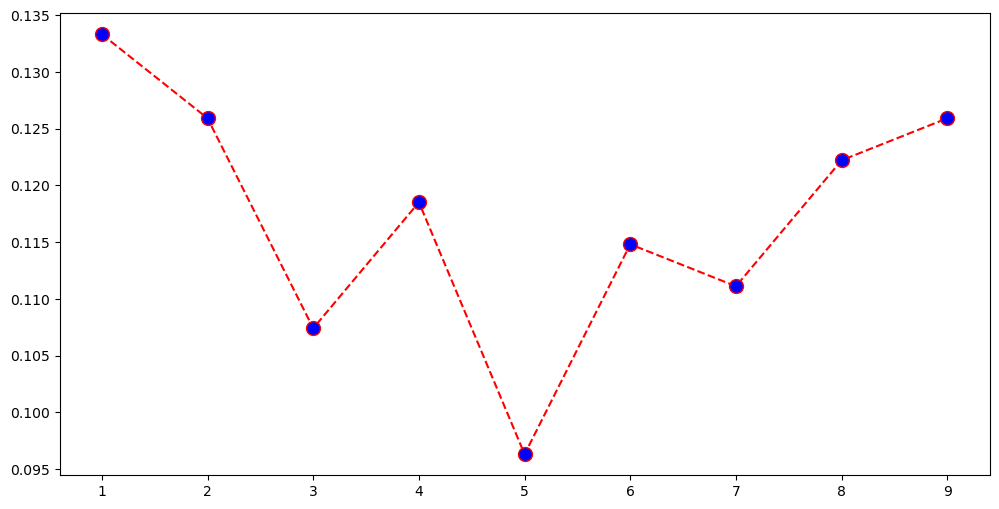

In [25]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

In [26]:
knn = KNeighborsClassifier(5)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test.values)

D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_pred)

0.9037037037037037

In [29]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [30]:
svm = Pipeline([
    ('linear_svc', LinearSVC(C=1))
])

In [31]:
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

D:\Programas\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
accuracy_score(y_test, y_pred_svm)

0.8888888888888888

In [33]:
import joblib
joblib.dump(svm, 'model_ponto_virada.joblib')

['model_ponto_virada.joblib']

In [34]:
def get_evadiu(row):
    if row['PONTO_VIRADA_2021'] != 0 and row['PONTO_VIRADA_2022'] == 0:
        return True
    elif row['PONTO_VIRADA_2020'] != 0 and row['PONTO_VIRADA_2021'] == 0:
        return True
    else:
        return False

In [35]:
df['evadiu'] = df.apply(get_evadiu, axis=1)

In [36]:
df_ultimo_1_ano = df.apply(get_ultimo_1_ano, axis=1, result_type='expand')
df_ultimo_1_ano.columns = [f'{parametro}_ultimo_1_ano' for parametro in parametros]

In [37]:
df_ultimo_2_ano = df.apply(get_ultimo_2_ano, axis=1, result_type='expand')
df_ultimo_2_ano.columns = [f'{parametro}_ultimo_2_ano' for parametro in parametros]

In [38]:
df_ultimo_3_ano = df.apply(get_ultimo_3_ano, axis=1, result_type='expand')
df_ultimo_3_ano.columns = [f'{parametro}_ultimo_3_ano' for parametro in parametros]

In [39]:
df = pd.concat([df_ultimo_1_ano, df_ultimo_2_ano, df_ultimo_3_ano, df[['evadiu']]], axis=1)

In [40]:
df = df.drop(['PONTO_VIRADA_ultimo_1_ano', 'PONTO_VIRADA_ultimo_2_ano', 'PONTO_VIRADA_ultimo_3_ano'], axis=1)

In [41]:
for coluna in df.columns:
    if coluna in ['PEDRA_ultimo_1_ano', 'PEDRA_ultimo_2_ano', 'PEDRA_ultimo_3_ano']:
        continue
    df[coluna] = df[coluna].apply(transform_in_float)

In [42]:
df.head()

,INDE_ultimo_1_ano,PEDRA_ultimo_1_ano,IAA_ultimo_1_ano,IEG_ultimo_1_ano,IPS_ultimo_1_ano,IDA_ultimo_1_ano,IPP_ultimo_1_ano,IPV_ultimo_1_ano,IAN_ultimo_1_ano,INDE_ultimo_2_ano,...,INDE_ultimo_3_ano,PEDRA_ultimo_3_ano,IAA_ultimo_3_ano,IEG_ultimo_3_ano,IPS_ultimo_3_ano,IDA_ultimo_3_ano,IPP_ultimo_3_ano,IPV_ultimo_3_ano,IAN_ultimo_3_ano,evadiu
0,7.319000,Ametista,7.50000,6.300000,6.9,8.800000,7.700000,8.100000,5.0,7.883752,...,0.000000,0,0.00000,0.0,0.000,0.0,0.0000,0.000000,0.0,1.0
1,7.675509,Ametista,10.00002,7.581705,7.5,8.816667,5.625000,7.916665,5.0,0.000000,...,0.000000,0,0.00000,0.0,0.000,0.0,0.0000,0.000000,0.0,0.0
2,7.021000,Ametista,7.10000,6.900000,6.3,5.600000,7.300000,7.200000,10.0,7.856390,...,0.000000,0,0.00000,0.0,0.000,0.0,0.0000,0.000000,0.0,1.0
3,7.117065,Ametista,10.00002,8.071429,7.5,5.083333,6.250000,8.055553,5.0,0.000000,...,5.076252,Quartzo,8.00002,4.1,6.875,0.0,7.1875,7.750000,5.0,1.0
4,7.232336,Ametista,6.41668,8.557505,7.5,7.083333,6.458333,7.833337,5.0,7.399000,...,8.077085,Ametista,7.50002,8.0,7.500,7.5,8.4375,8.166665,10.0,0.0


In [43]:
x = df.drop(['PEDRA_ultimo_1_ano', 'PEDRA_ultimo_2_ano', 'PEDRA_ultimo_3_ano', 'evadiu'], axis=1)
y = df['evadiu']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [45]:
error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test.values)
    error.append(np.mean(pred_i != y_test))

D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not 

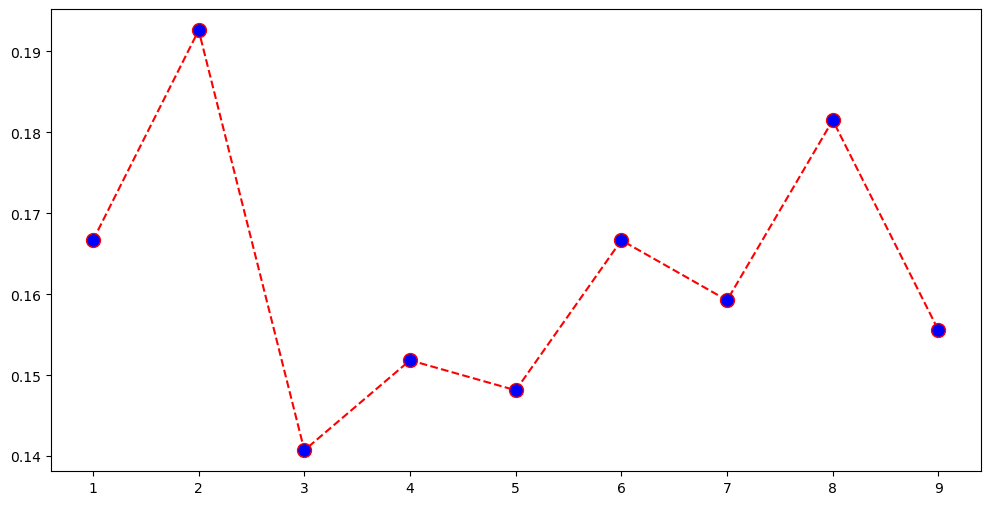

In [46]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

In [47]:
knn = KNeighborsClassifier(3)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test.values)

D:\Programas\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [48]:
accuracy_score(y_test, y_pred)

0.8592592592592593

In [49]:
svm = Pipeline([
    ('linear_svc', LinearSVC(C=1))
])

In [50]:
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

D:\Programas\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Programas\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
accuracy_score(y_test, y_pred_svm)

0.8111111111111111

In [54]:
# joblib.dump(knn, 'model_evasao.joblib')

['model_evasao.joblib']